## Tewa 1 Tutorial, 
Linear Regression using scikit-learn (sklearn), data in Pandas DataFrame

- fitting linear regression models 

- checking coefficients of fitted models

- checking quality of model fit  

### 27 April 2022-- Jozsef Arato


### load libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg,stats

### load data

In [2]:
df=pd.read_csv('data/Real estate.csv')

Data Set Information:

The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan. 

Attribute Information:

The inputs are as follows

X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)

X2=the house age (unit: year)

X3=the distance to the nearest MRT station (unit: meter)

X4=the number of convenience stores in the living circle on foot (integer)

X5=the geographic coordinate, latitude. (unit: degree)

X6=the geographic coordinate, longitude. (unit: degree)

The output is as follow

Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)



In [3]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


data-set size

In [4]:
np.shape(df)

(414, 8)

In [5]:
list(df)

['No',
 'X1 transaction date',
 'X2 house age',
 'X3 distance to the nearest MRT station',
 'X4 number of convenience stores',
 'X5 latitude',
 'X6 longitude',
 'Y house price of unit area']

In [6]:
vars=list(df)
print(vars)

['No', 'X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'Y house price of unit area']


different ways of accessing a column from a dataframe

In [7]:
df.iloc[:,7]
df[vars[7]]
df['Y house price of unit area']

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

## Explorative data visualization
visualize the data with scatter plots (for the 4 X1-X6 predictors separately)

In [250]:
y_name = "Y house price of unit area"
x_names = list(df.drop(["No",y_name], axis = 1))

corr_Xy = df.drop("No", axis = 1).corr()[[y_name]].sort_values(y_name).drop(y_name,axis = 0)
corr_Xy

,Y house price of unit area
X3 distance to the nearest MRT station,-0.673613
X2 house age,-0.210567
X1 transaction date,0.087491
X6 longitude,0.523287
X5 latitude,0.546307
X4 number of convenience stores,0.571005


In [254]:
corr_Xy_abs = corr_Xy.abs().sort_values(y_name, ascending=False)
corr_Xy_abs

,Y house price of unit area
X3 distance to the nearest MRT station,0.673613
X4 number of convenience stores,0.571005
X5 latitude,0.546307
X6 longitude,0.523287
X2 house age,0.210567
X1 transaction date,0.087491


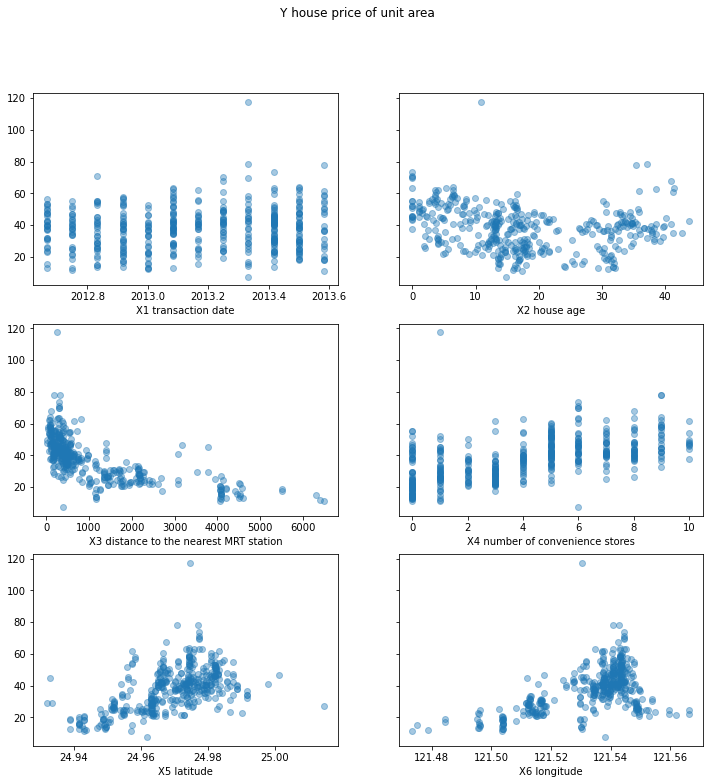

In [263]:
plt.subplots(3, 2, figsize = (12, 12), sharey = True)
plt.suptitle(y_name)

for i, x_name in enumerate(x_names):
    plt.subplot(3, 2, i + 1)
    plt.scatter(x = df[x_name], y = df[y_name], alpha = 0.4)
    plt.xlabel(x_name)

## Correlation between predictors

In [99]:
df[x_names].corr().round(2)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
X1 transaction date,1.00,0.02,0.06,0.01,0.04,-0.04
X2 house age,0.02,1.00,0.03,0.05,0.05,-0.05
X3 distance to the nearest MRT station,0.06,0.03,1.00,-0.60,-0.59,-0.81
X4 number of convenience stores,0.01,0.05,-0.60,1.00,0.44,0.45
X5 latitude,0.04,0.05,-0.59,0.44,1.00,0.41
X6 longitude,-0.04,-0.05,-0.81,0.45,0.41,1.00


<AxesSubplot:>

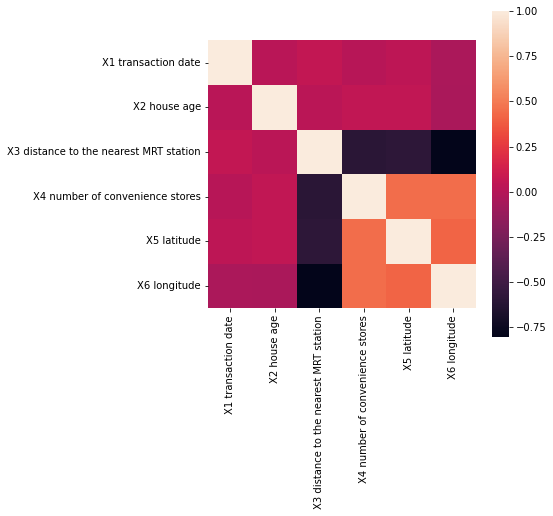

In [89]:
import seaborn as sns

plt.figure(figsize = (6, 6))
sns.heatmap(df[x_names].corr(), square = True)

## Linear regression with a single predictor
using the sklearn library

now we use only one predictor, that is house age, to predict aparment price


sklearn uses an "object oriented" programming style

that is a slightly different syntax form numpy,matplotlib

(but somewhat similar to pandas, a pandas dataframe is an object)

fitting the regression model

check fitted parameters intercept and coefs

In [115]:
from sklearn.linear_model import LinearRegression

x_name = "X2 house age"

reg_lin = LinearRegression()  # we create a linear regression object
reg_lin.fit(df[[x_name]], df[y_name])

print("intercept =",reg_lin.intercept_,"\nslope =", reg_lin.coef_[0])

intercept = 42.4346970462629 
slope = -0.25148841908534547


score-- coefficient of determination


In [147]:
# R²
R2_reg_lin = reg_lin.score(df[[x_name]], df[y_name])
R2_reg_lin

0.04433848097791171

prediction of the regression model

In [117]:
y_pred = reg_lin.predict(df[[x_name]])

visualize prediction using matplotlib

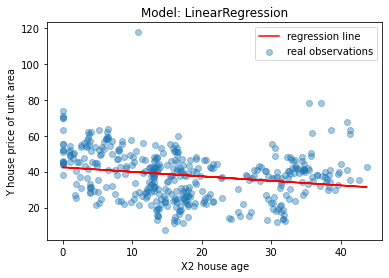

In [140]:
plt.plot(df[[x_name]], y_pred, c = "red", label = "regression line")
plt.scatter(df[x_name], df[y_name], alpha = 0.4, label = "real observations")
plt.ylabel(y_name)
plt.xlabel(x_name)
plt.title("Model: " + str(reg_lin)[:-2])
plt.legend();

## Multiple linear regression

now let's use the 4 four measurements X1-X4 in a combined model

for this we make a comnined predictor matrix from our original dataframe, containig only the predictors we want to use:

fit multiple linear regression

In [145]:
reg_mlin = LinearRegression() 
reg_mlin.fit(df[x_names[:-2]], df[y_name])

print("intercept =",reg_mlin.intercept_,"\ncoeffs =", reg_mlin.coef_)

intercept = -11588.74780012621 
coeffs = [ 5.77804282e+00 -2.54477973e-01 -5.51299698e-03  1.25786410e+00]


observe fitted parameters and goodness of fir

compare to invidual model above

In [148]:
# R²
R2_reg_mlin = reg_mlin.score(df[x_names[:-2]], df[y_name])
R2_reg_mlin

0.555297320736279

In [149]:
# delta R¹
R2_reg_mlin - R2_reg_lin

0.5109588397583673

The 4 predictor model explains more variance than the previous model with a sole predictore "House age"

# comparison to scipy.linalg.lstsq

fit intercept parameter vs column of ones in design matrix

and use lstsq to fit a regression model

In [187]:
from scipy.linalg import lstsq

# adding column of ones for intercept
X = pd.concat([df[x_names[:-2]], pd.DataFrame(np.ones(len(df)))], axis = 1)

coeff, err, _, _ = lstsq(X, df[y_name])

print("intercept =",coeff[-1],"\ncoeffs =", coeff[:-1])

intercept = -11588.747800133522 
coeffs = [ 5.77804282e+00 -2.54477973e-01 -5.51299698e-03  1.25786410e+00]


**Same result as with sklearn**

##  feature selection
 1. add predictors (features) one by one, use X1 only first, and add all predictors sequentially until X6, and plot the obtained score for each model (as a function of the number of predictors)
 2. add predictors in a random order one-by-one, and plot the obtained score for each model
 3. add predictors in the order of the absolute pearson correlation with the outcome variable Y (starting with the largest), and plot the obtained score

### Sequence X1, X2, X3, X4, X5, X6

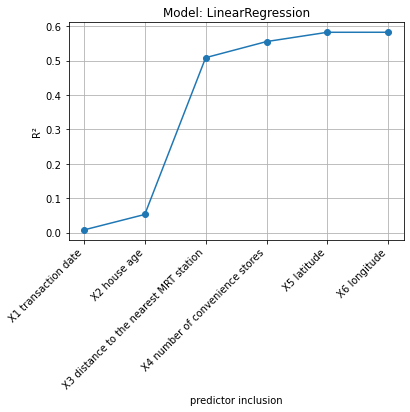

In [230]:
scores = []

for i, x_name in enumerate(x_names):

    reg = LinearRegression()
    reg_mlin.fit(df[x_names[:i + 1]], df[y_name])
    scores.append(reg_mlin.score(df[x_names[:i + 1]], df[y_name]))

plt.plot(x_names, scores, marker = "o")
plt.xticks(rotation = 45, ha = "right")
plt.xlabel("predictor inclusion")
plt.ylabel("R²")
plt.title("Model: " + str(reg)[:-2])
plt.grid();

### Random sequence

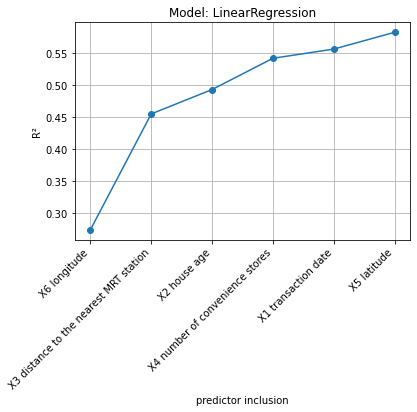

In [261]:
np.random.seed(0) 

x_names_random = np.random.choice(x_names, len(x_names), replace = False)

scores = []

for i, x_name in enumerate(x_names_random):

    reg = LinearRegression()
    reg_mlin.fit(df[x_names_random[:i + 1]], df[y_name])
    scores.append(reg_mlin.score(df[x_names_random[:i + 1]], df[y_name]))

plt.plot(x_names_random, scores, marker = "o")
plt.xticks(rotation = 45, ha = "right")
plt.xlabel("predictor inclusion")
plt.ylabel("R²")
plt.title("Model: " + str(reg)[:-2])
plt.grid();

### Sequence according the correlation (highest first)

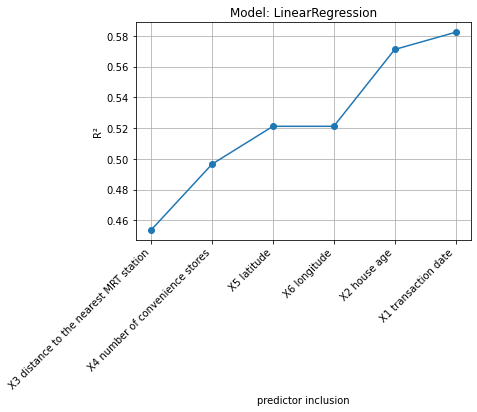

In [260]:
x_names_corr = list(corr_Xy_abs.T)

scores = []

for i, x_name in enumerate(x_names_corr):

    reg = LinearRegression()
    reg_mlin.fit(df[x_names_corr[:i + 1]], df[y_name])
    scores.append(reg_mlin.score(df[x_names_corr[:i + 1]], df[y_name]))

plt.plot(x_names_corr, scores, marker = "o")
plt.xticks(rotation = 45, ha = "right")
plt.xlabel("predictor inclusion")
plt.ylabel("R²")
plt.title("Model: " + str(reg)[:-2])
plt.grid();

**This shows some multicollinearity between latitude and longitude. despite both being considerably correlated with the outcome, they seem to explain the same "thing" and thus one does not add any value after the inclusion of the other one.**

## training and test set
split the X and Y data into 80% training and 20% test sets


In [365]:
test_size = 0.2

# random sample for test_set
n_test = round(test_size * len(df))
i_test = np.random.choice(df.index, size = n_test, replace = False)
df_test = df.loc[i_test]

# the rest is train set
df_train = df.drop(i_test, axis = 0)

X_train = df_train[x_names]
y_train = df_train[y_name]
X_test = df_test[x_names]
y_test = df_test[y_name]

print("X_train:", X_train.shape[0], "rows,", X_train.shape[1], "features")
print("y_train:", y_train.shape[0], "rows")
print("\nX_test: ", X_test.shape[0], "rows,", X_test.shape[1], "features")
print("y_test: ", y_test.shape[0], "rows")

X_train: 331 rows, 6 features
y_train: 331 rows

X_test:  83 rows, 6 features
y_test:  83 rows
